## PROJECT CONTEXT
 To predict the fair transaction price of a property before it's sold.

## PROBLEM SPECIFICS
- Deliverable: Trained model file and executable 
- Machine learning task: Regression
- Target variable: Transaction Price
- Win condition: Avg. prediction error < $70,000

<font size='6' color='red'>EXPLORATORY ANALYSIS</font>

##### BASIC INFO.

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_colwidth',100,'display.max_columns',999)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('real_estate_data.csv')

In [3]:
df.shape

(1883, 26)

In [4]:
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [5]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [6]:
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


In [7]:
df.dtypes[df.dtypes == object]

property_type     object
exterior_walls    object
roof              object
dtype: object

<font size='4' color='dark orange'>VISUALS
- for numerical features :-</font>

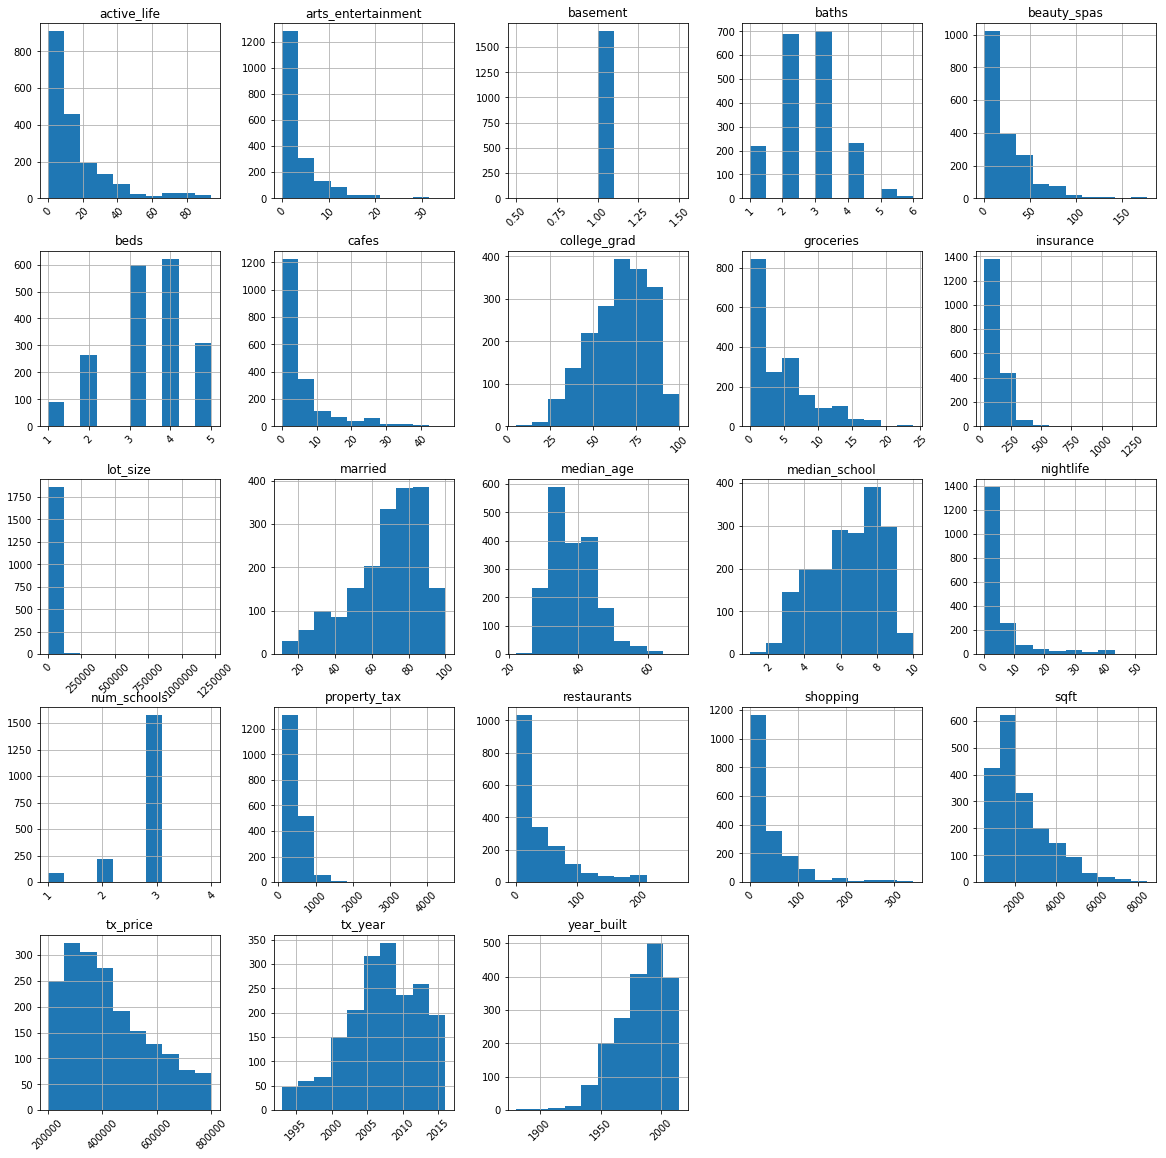

In [8]:
df.hist(figsize=(20,20),xrot=45)
plt.show()

In [9]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


<font size='4' color='dark orange'>VISUALS
- for categorical features :-</font>

In [10]:
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


### Plotting bar graph of all the categorical features

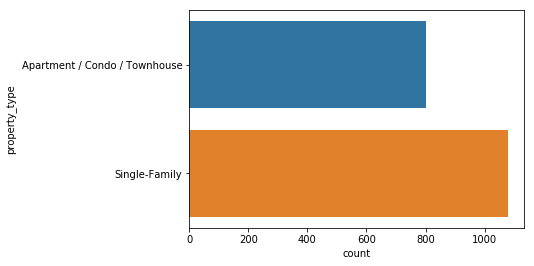

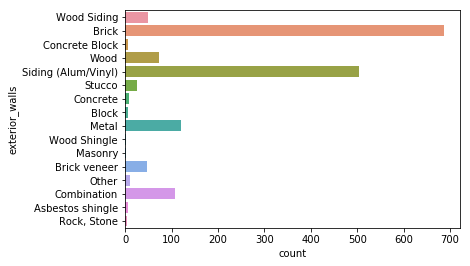

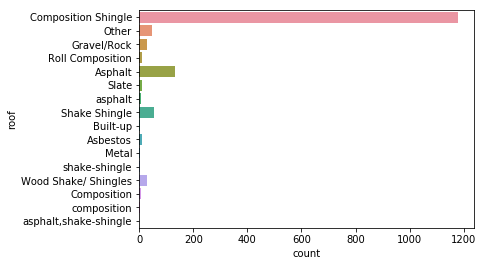

In [11]:
for feature in df.dtypes[df.dtypes==object].index:
    sns.countplot(y=feature,data=df)
    plt.show()

<font size='4' color='dark orange'>SEGMENTATIONS
- relationship between categorical and numeric features :- </font>

In [12]:
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


We get an idea from groupby function that our target variable tx_price, property_type and sqft are directly
proportional. Hence, we will check the distribution with a boxplot for proper segmentation.

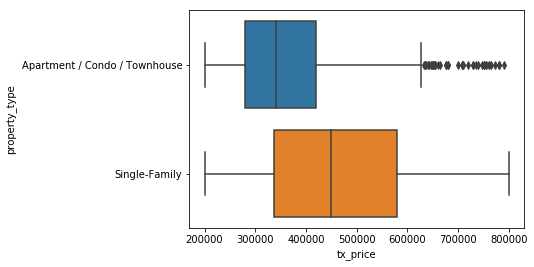

In [13]:
sns.boxplot(x='tx_price', y='property_type', data=df)

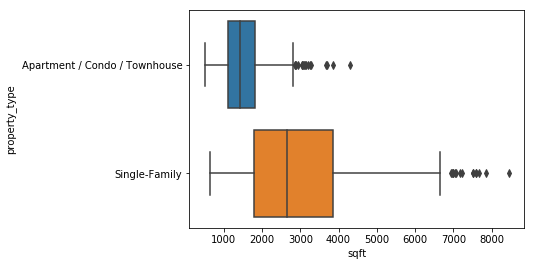

In [14]:
sns.boxplot(x='sqft', y='property_type', data=df)

In [15]:
# Giving a list of metrics in the aggregating function after groupby
df.groupby('property_type').agg([np.mean, np.std])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

<font size='4' color='dark orange'>CORRELATION
- relationship between numeric features :- </font>

In [16]:
correlation = df.corr()

In [17]:
correlation

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


In [18]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

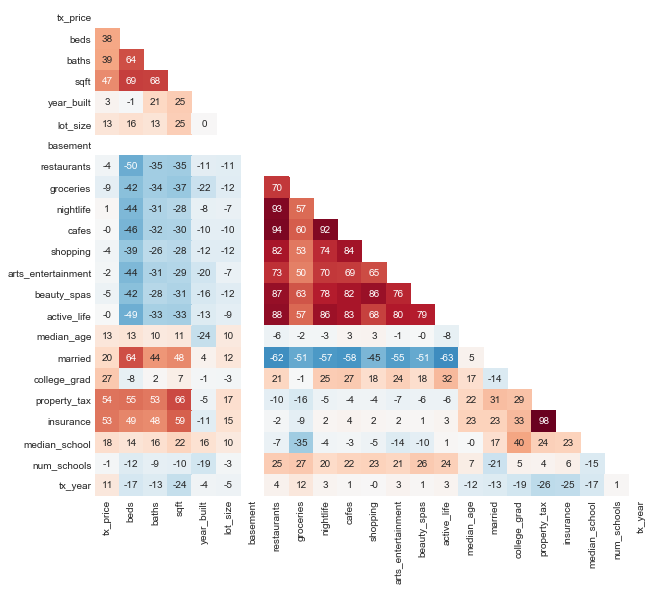

In [19]:
sns.set_style('white')
plt.figure(figsize=(10,9))
sns.heatmap(data=correlation*100,center=0,cmap="RdBu_r",annot=True,fmt='0.0f',mask=mask, cbar=False)

<font size='6' color='red'>DATA CLEANING</font>

In [20]:
#drop the dupicate observations in dataframe
df = df.drop_duplicates()

##### As we have seen in our heatmap of correlation that basement correlation can not be evaluated, so let's check basement unique values.

In [21]:
df.basement.unique()

array([nan,  1.])

In [22]:
# turning basement into true indicator variable by filling the nan values of basement to zero
df['basement'] = df.basement.fillna(0)

In [23]:
df.basement.unique()

array([0., 1.])

##### We have to correct typos in the names of categorical features as seen in the seaborn's countplot

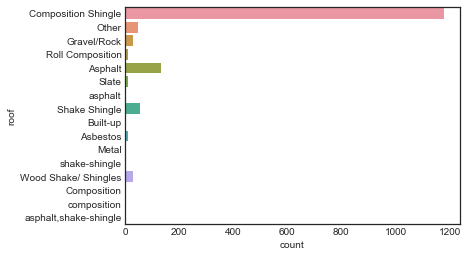

In [24]:
sns.countplot(y='roof',data=df)

In [25]:
df.roof.replace('composition','Composition',inplace=True)
df.roof.replace('asphalt','Asphalt',inplace=True)
df.roof.replace(['shake-shingle','asphalt,shake-shingle'],'Shake Shingle',inplace=True)

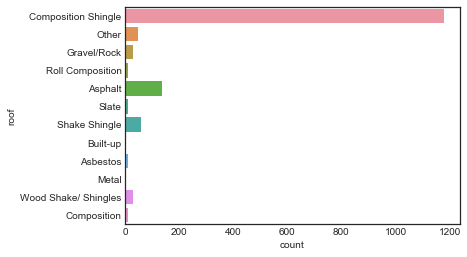

In [26]:
sns.countplot(y='roof',data=df)

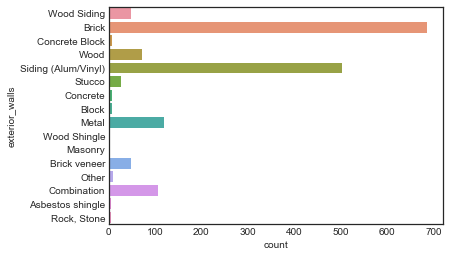

In [27]:
sns.countplot(y='exterior_walls',data=df)

In [28]:
df.exterior_walls.replace('Rock, Stone','Masonry',inplace=True)

df.exterior_walls.replace(['Concrete','Block'],'Concrete Block',inplace=True)

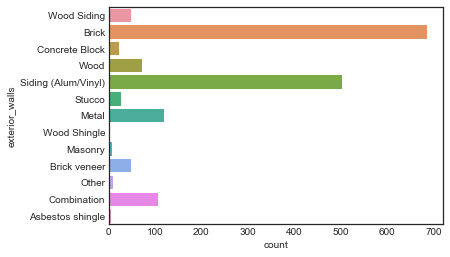

In [29]:
sns.countplot(y='exterior_walls',data=df)

<font size='4' color='dark orange'> VIOLIN PLOTS - for finding outliers among each feature i.e. column</font>

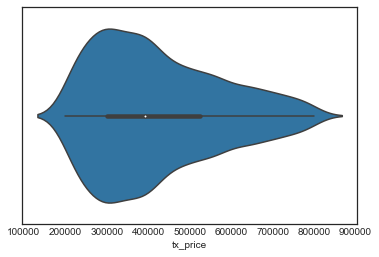

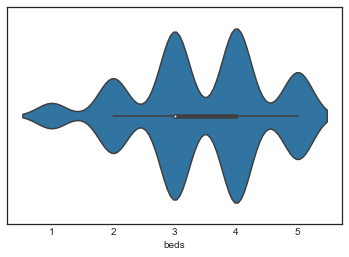

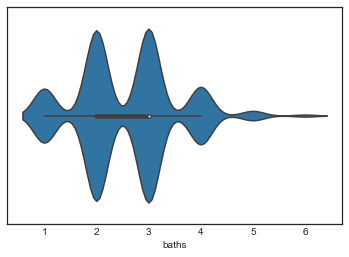

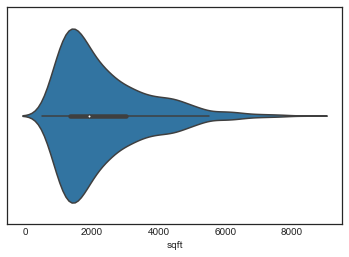

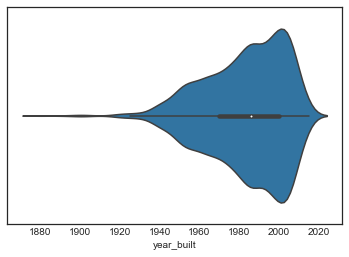

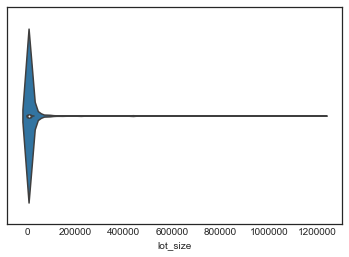

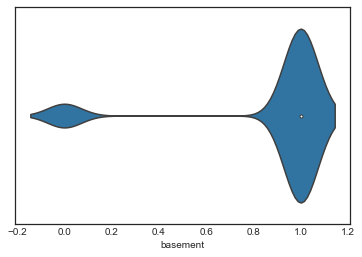

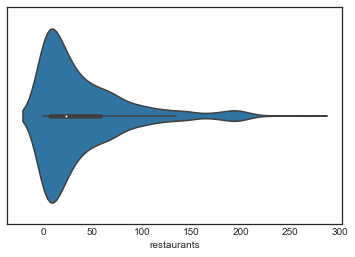

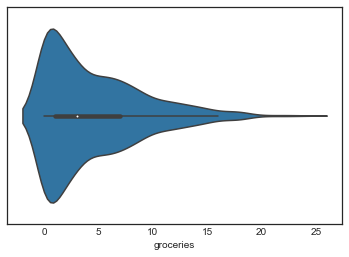

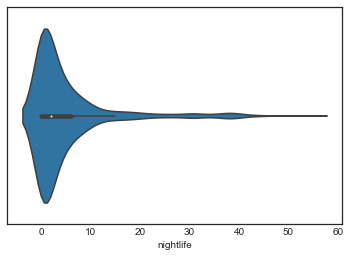

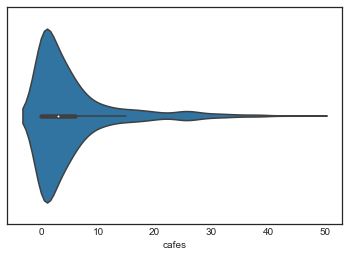

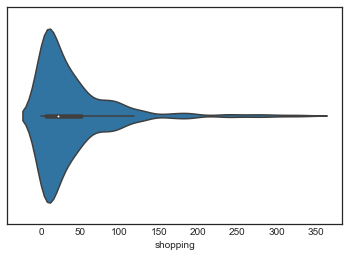

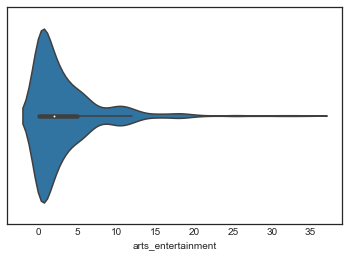

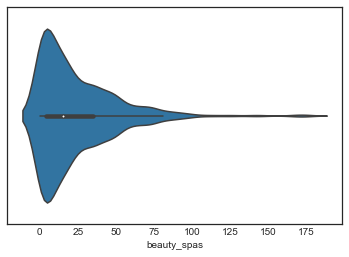

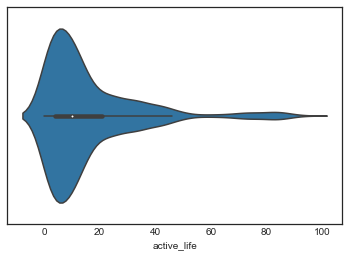

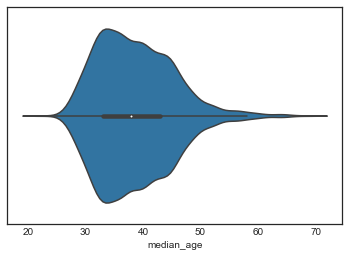

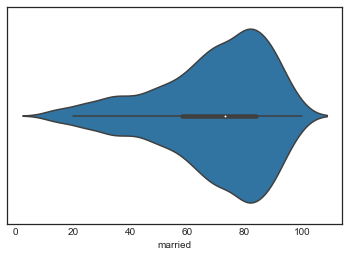

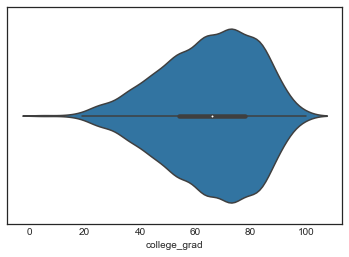

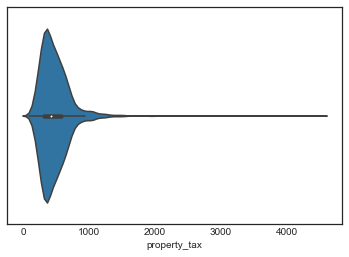

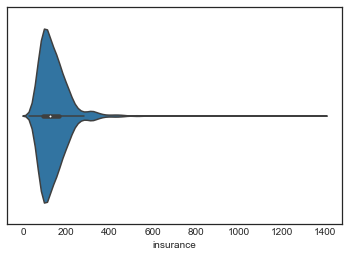

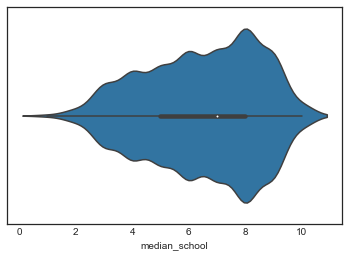

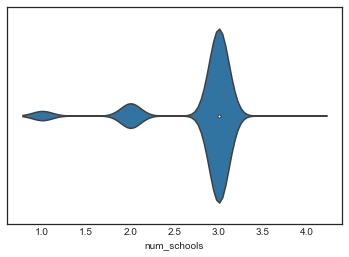

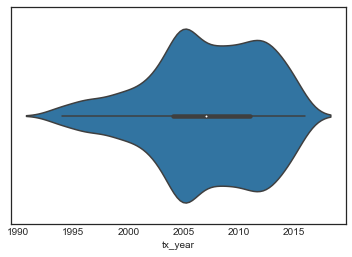

In [30]:
for feature in df.dtypes[df.dtypes!=object].index:
    sns.violinplot(feature,data=df)
    plt.show()

##### We can see that lot_size violin plot is indicating a potential outlier due to it's skinny and long tail

In [31]:
# checking the largest 10 values in the lot_size to confirm any outliers
df.lot_size.sort_values(ascending=False).head(10)

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
1839     435600
1817     435600
1570     435600
1852     351529
1479     343252
Name: lot_size, dtype: int64

In [32]:
# removing the observation 102 due to it's lot_size
# otherwise it will interfere the model to predict normal size properties.
df = df[df.lot_size<=500000]
print(len(df))

1882


<font size='4' color='dark orange'> LABELING MISSING DATA</font>

In [33]:
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [34]:
for column in df.dtypes[df.dtypes==object].index:
    print(column)
    df[column] = df[column].fillna('Missing')
    
df.select_dtypes(include=['object']).isnull().sum()

property_type
exterior_walls
roof


property_type     0
exterior_walls    0
roof              0
dtype: int64

In [35]:
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [36]:
# saved cleaned dataframe for tweaking the features differently in future
df.to_csv('cleaned_df.csv',index=None)

<font size='6' color='red'>FEATURE ENGINEERING</font>
<font size='4' color='blue'>  creative heuristics....</font>

In [37]:
# Indicator variable for properties with 2 beds and 2 baths
df['two_two'] = ((df.beds==2)& (df.baths==2)).astype(int)
# The percentage of property with 2 beds and 2 baths
print('The proportion of property with 2beds & 2baths',df.two_two.mean())

The proportion of property with 2beds & 2baths 0.09458023379383634


,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_two
164,330000,2,2,832,1943,1136,Apartment / Condo / Townhouse,Brick,Roll Composition,1.0,61,9,9,12,65,7,41,42,37.0,41.0,53.0,372.0,123.0,4.0,3.0,2009,1
165,250000,2,2,864,1942,1633,Apartment / Condo / Townhouse,Brick,Roll Composition,1.0,82,8,20,19,64,5,36,43,35.0,47.0,32.0,375.0,124.0,4.0,3.0,2008,1
166,200000,2,2,877,2000,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,201,11,40,28,131,10,73,85,36.0,25.0,91.0,378.0,131.0,9.0,3.0,2012,1
167,286499,2,2,886,1981,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,19,3,1,5,28,3,9,13,48.0,40.0,59.0,195.0,59.0,7.0,1.0,2005,1
168,237500,2,2,886,1982,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,19,3,1,5,28,3,9,13,48.0,40.0,59.0,198.0,60.0,7.0,1.0,2014,1
169,261000,2,2,896,1951,3598,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,17,5,1,4,30,2,21,7,41.0,62.0,41.0,307.0,93.0,4.0,3.0,2009,1
170,277000,2,2,899,2000,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,75,3,8,12,82,9,37,34,56.0,25.0,67.0,269.0,82.0,7.0,3.0,2009,1
171,425000,2,2,910,1950,6023,Single-Family,Brick veneer,Shake Shingle,1.0,60,10,4,7,61,5,42,30,39.0,86.0,81.0,468.0,162.0,9.0,3.0,2008,1
172,385000,2,2,915,2005,183387,Apartment / Condo / Townhouse,Brick,Missing,0.0,146,8,16,20,74,11,49,58,30.0,46.0,41.0,265.0,92.0,7.0,3.0,2006,1
173,275000,2,2,930,1983,1625,Apartment / Condo / Townhouse,Siding (Alum/Vinyl),Composition Shingle,1.0,27,6,1,3,22,5,23,15,35.0,55.0,73.0,286.0,87.0,5.0,3.0,2008,1


In [38]:
# recession indicator variable
df['during_recession']=df.tx_year.between(2010,2013).astype(int)

In [39]:
#property age at the time of transaction
df['property_age']= df.tx_year - df.year_built
print('observations with negative property age are',sum(df.property_age<0))
df.property_age.sort_values().head()

observations with negative property age are 19


406    -8
1828   -8
1782   -7
1874   -4
1864   -2
Name: property_age, dtype: int64

In [40]:
# removing property_age less than zero
df = df[df.property_age >=0]
print(len(df))
df.shape

1863


(1863, 29)

In [41]:
# adding school_score feature
df['school_score']= df.num_schools * df.median_school
print(df.school_score.median())

18.0


<font size='5' color='dark orange'>Grouping sparse classes</font>

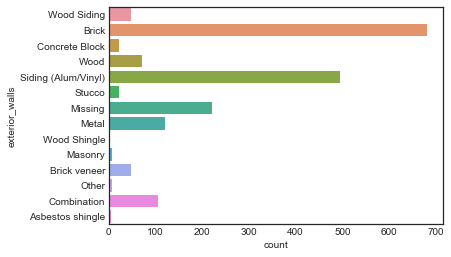

In [42]:
sns.countplot(y='exterior_walls',data=df)

In [43]:
df.exterior_walls.replace(['Wood Siding','Wood Shingle','Wood'],'Wood',inplace=True)

In [44]:
# List of classes to group
other_exterior_walls=['Stucco','Other','Asbestos shingle','Concrete Block','Masonry']

df.exterior_walls.replace(other_exterior_walls,'Other',inplace=True)

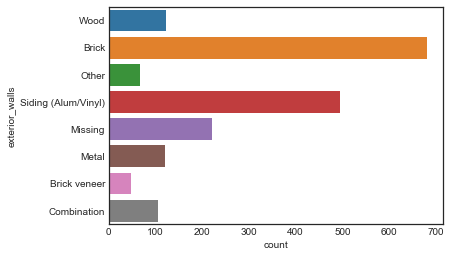

In [45]:
sns.countplot(y='exterior_walls',data=df)

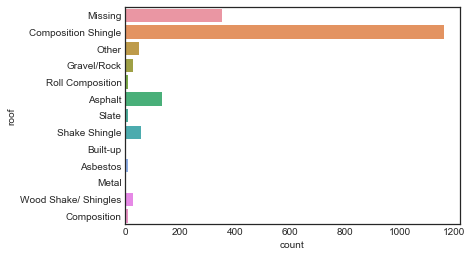

In [46]:
sns.countplot(y='roof',data=df)

In [47]:
df.roof.replace(['Composition','Wood Shake/ Shingles'],'Composition Shingle',inplace=True)

other_roofs=['Other','Gravel/Rock','Roll Composition','Slate','Built-up','Asbestos','Metal']
df.roof.replace(other_roofs,'Other',inplace=True)

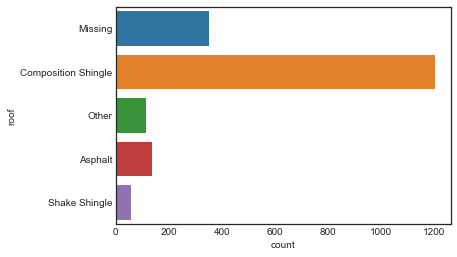

In [48]:
sns.countplot(y='roof',data=df)

In [49]:
# after merging the sparse classes we will encode dummy features for each class
df = pd.get_dummies(df,columns=['exterior_walls','roof','property_type'])

In [50]:
# removing redundant features
df = df.drop(['tx_year','year_built'],axis=1)

In [51]:
df.head()

,tx_price,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,0,1,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,0,1,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [52]:
df.to_csv('analytical_base_table.csv',index=None)